<div style="text-align: left; background-color:#0D1C5A; font-family:newtimeroman; color:#F1F40D; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 40px;border-style: solid;border-color: dark green;"> 🏠 House Prices Predictions
    <br>
    〽️ Preprocessing + EDA + Modelling🚀 </div>
    
<h3 style="text-align: center;font-family: Verdana; font-size: 30px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A3399; background-color: #ffffff;"><b>Advanced</b> Regression<b> Techniques</b></h3>

<br>    
<p style="text-align: center;">
<img src="https://raw.githubusercontent.com/ntclai/PictureForMyProject/main/-18798-2048x1070-0.jpg" style='width: 700px; height: 650px;'>
</p>


<a id="top"></a>
# <p style="padding:10px;background-color:#0D1C5A;margin:0;color:#F1F40D;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Table Of Contents</p> 

<div style="background-color:aliceblue; padding:30px; font-size:15px;color:#8C0511">
    
* [1. Introduction](#1)
* [2. Import libraries](#2)    
* [3. Preprocess and Visualize data](#3)
    - [Overall](#3.0)
    - [Columns 1 - 16](#3.1)
    - [Columns 17 - 32](#3.2)
    - [Columns 33 - 48](#3.3)
    - [Columns 49 - 64](#3.4)
    - [Columns 65 - 80](#3.5)
    - [Pineline](#3.6)
* [4. Run Machine Learning model](#4)
    - [4.1 Evaluation function](#4.1)
    - [4.2 List of machine learning model](#4.2)
    - [4.3 Train model and evaluate](#4.3)
    - [4.4 Predict on test data](#4.4)
* [5. Conclusion and submission](#5)
    - [5.1 Conclusion](#5.1)
    - [5.2 Submission](#5.2)
* [6. Author Message](#6)
    

<a id="1"></a>
# <p style="padding:10px;background-color:#0D1C5A;margin:0;color:#F1F40D;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Introduction </p>

<div style="border-radius:10px;border:#034914 solid;padding: 15px;background-color:aliceblue;font-size:110%;text-align:left">
    
<strong>Subject:</strong> Kaggle Competition - House Prices - Advanced regression techniques
<br>
<strong>Summary:</strong>
- This is a contest held on the Kaggle website, the goal of the contest is to find machine learning models to predict house prices based on the properties provided. The model will be ranked higher if the error between prediction and reality is smaller.
<br>

<strong>Main presentation items:</strong> <br>
- Data overview, data analysis and preprocessing.<br>
- Build data preprocessing model.<br>
- Select <b>regression models</b> to make predictions: Linear Regression, Decision Tree Regression, Ridge Regression, Lasso Lars, SVR, Gradient Boosting, Random Forest Regression, Logistic Regression, Bayesian Ridge.<br>
- Experiment: train the models on the provided data, calculate the error of the models and make predictions on Kaggle's test set.
    
<p style="text-align: center;">
<img src="https://raw.githubusercontent.com/ntclai/PictureForMyProject/main/cover_2022.jpeg" style='width: 500px; height: 300px;'>
</p>
</div>

<center> <a href="#top" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="2"></a>
# <p style="padding:10px;background-color:#0D1C5A;margin:0;color:#F1F40D;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Importing Libraries</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_squared_log_error
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
from sklearn.model_selection import train_test_split

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, LassoLars, SGDRegressor, Ridge, LogisticRegression, BayesianRidge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

set_config(display='diagram') 

<center> <a href="#top" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="3"></a>
# <p style="padding:10px;background-color:#0D1C5A;margin:0;color:#F1F40D;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Preprocess and Visualize data</p>

<a id="3.0"></a>
<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#470437;font-size:200%;font-weight: 500;color:white;overflow:hidden;">ㅤOverallㅤ</span>
<p style="text-align: center;">
<img src="https://raw.githubusercontent.com/ntclai/PictureForMyProject/main/chart.png" style='width: 150px; height: 150px;'>
</p>

In [2]:
data_df = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
data_df.head().style.set_properties(**{'background-color': 'aliceblue' ,'color':'black','border-color': '#8b8c8c'})

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000000,8450,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,nan,Attchd,2003.000000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,nan,nan,nan,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000000,9600,Pave,nan,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,nan,nan,nan,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000000,11250,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,nan,nan,nan,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000000,9550,Pave,nan,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,nan,nan,nan,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000000,14260,Pave,nan,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,nan,nan,nan,0,12,2008,WD,Normal,250000


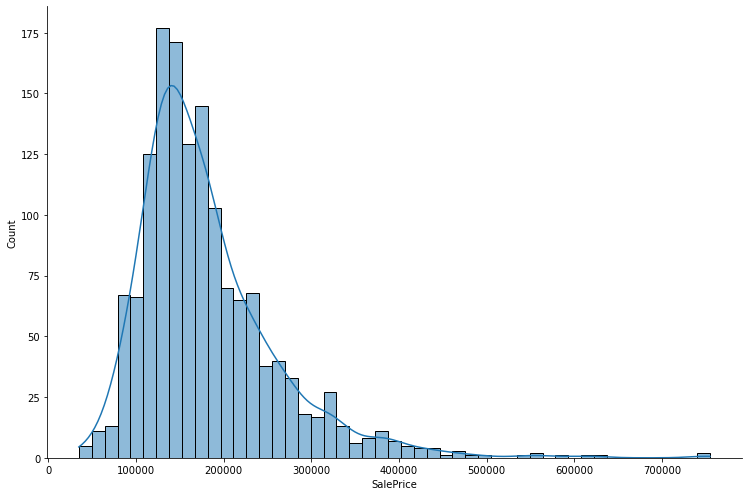

In [3]:
sns.displot(x=data_df['SalePrice'],kde=True,height=7,aspect=1.5);

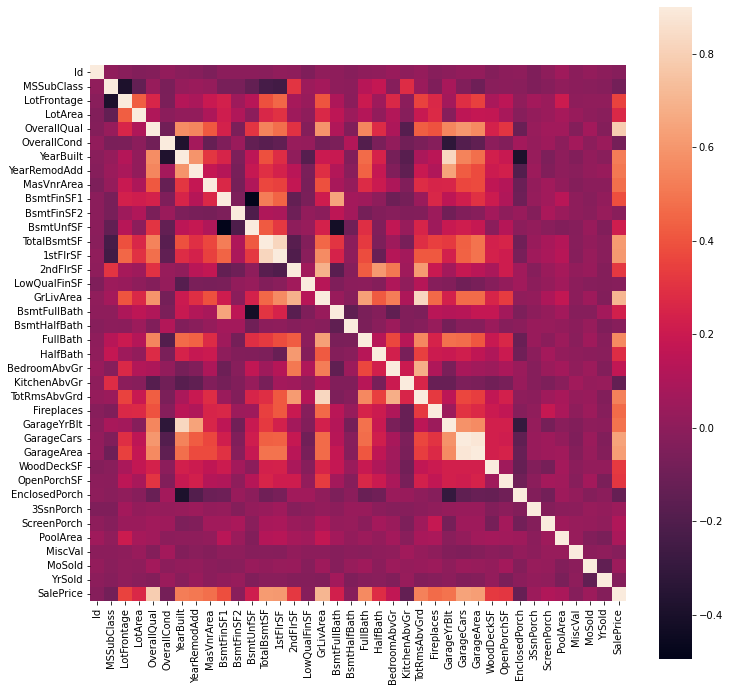

In [4]:
corrmat = data_df.corr()
plt.subplots(figsize=(12,12))
sns.heatmap(corrmat, vmax=0.9, square=True);

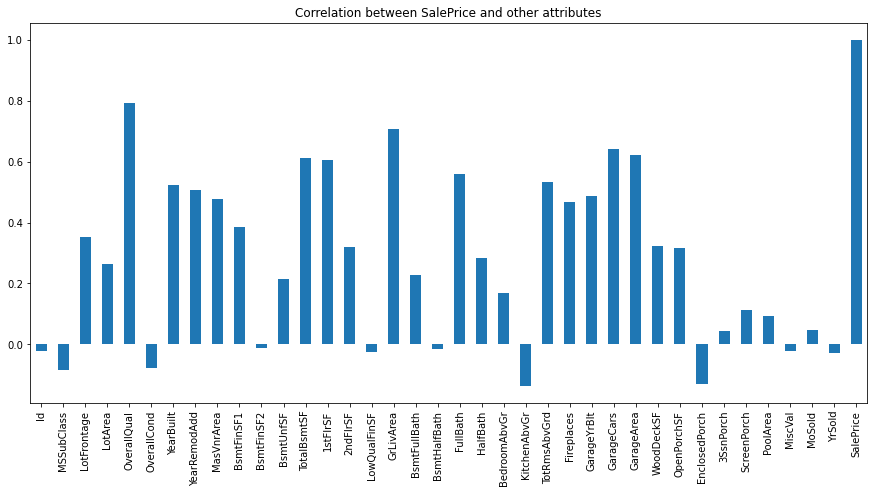

In [5]:
corrmat['SalePrice'].plot(kind='bar',figsize=(15,7),title='Correlation between SalePrice and other attributes');

<center> <a href="#top" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="3.1"></a>
<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#470437;font-size:200%;font-weight: 500;color:white;overflow:hidden;">ㅤColumns 1 - 16ㅤ</span>
<p style="text-align: center;">
<img src="https://raw.githubusercontent.com/ntclai/PictureForMyProject/main/chart.png" style='width: 150px; height: 150px;'>
</p>

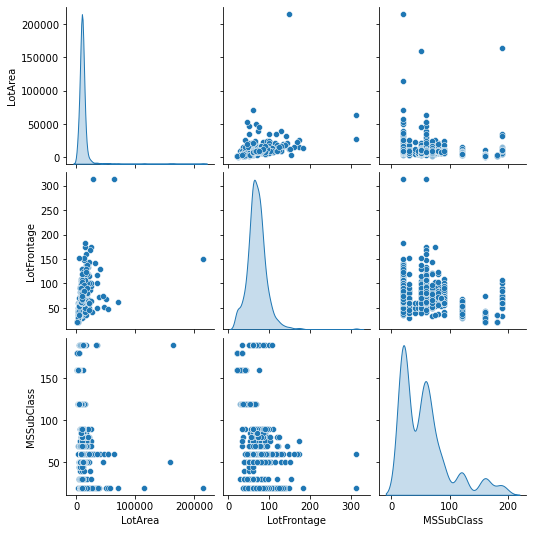

In [6]:
sns.pairplot(data_df[['LotArea','LotFrontage','MSSubClass']],diag_kind="kde");

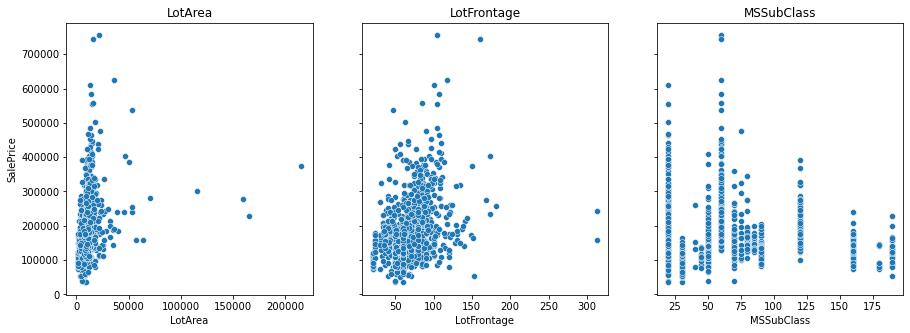

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.scatterplot(ax=axes[0], x=data_df['LotArea'], y=data_df['SalePrice'])
axes[0].set_title('LotArea')
sns.scatterplot(ax=axes[1], x=data_df['LotFrontage'], y=data_df['SalePrice'])
axes[1].set_title('LotFrontage')
sns.scatterplot(ax=axes[2], x=data_df['MSSubClass'], y=data_df['SalePrice'])
axes[2].set_title('MSSubClass');


We see that all three factors above have almost no influence on the selling price

In [8]:
modeImputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
meanImputer = SimpleImputer(missing_values=np.nan, strategy='mean')
noneImputer = SimpleImputer(fill_value='None',strategy='constant')

With the `LotFrontage` column, we will fill in the mean value for the `nan` positions.

In [9]:
meanImputer.fit(data_df.loc[:,'LotFrontage'].values.reshape(-1, 1))
data_df.loc[:,'LotFrontage']=meanImputer.transform(data_df.loc[:,'LotFrontage'].values.reshape(-1, 1))

For the `Alley` column, according to the description from the description file, the value `nan` means there is no input, so we will enter `None`.

In [10]:
noneImputer.fit(data_df.loc[:,'Alley'].values.reshape(-1, 1))
data_df.loc[:,'Alley']=noneImputer.transform(data_df.loc[:,'Alley'].values.reshape(-1, 1))

<center> <a href="#top" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="3.2"></a>
<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#470437;font-size:200%;font-weight: 500;color:white;overflow:hidden;">ㅤColumns 17 - 32ㅤ</span>
<p style="text-align: center;">
<img src="https://raw.githubusercontent.com/ntclai/PictureForMyProject/main/chart.png" style='width: 150px; height: 150px;'>
</p>

In [11]:
name_2 = data_df.columns[17:33].to_list()

In [12]:
data_df[name_2].isnull().sum()

OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       8
MasVnrArea       8
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual        37
BsmtCond        37
BsmtExposure    38
dtype: int64

In [13]:
data_df["MasVnrType"].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [14]:
data_df[data_df['MasVnrArea'].isnull()].index

Int64Index([234, 529, 650, 936, 973, 977, 1243, 1278], dtype='int64')

In [15]:
data_df[data_df['MasVnrType'].isnull()].index

Int64Index([234, 529, 650, 936, 973, 977, 1243, 1278], dtype='int64')

If you fill in `mode`, `MasVnrType` will be entered as `None`.


As we can see the column `BsmtQual` is missing 37 values. We check the description file and see that these columns are the height of the basement. Missing columns mean no basement. <br />
Columns `MasVnrArea` and `MasVnrType` are missing 8 values. These two columns are related, namely `MasVnrType` and `MasVnrArea`.
We will proceed to fill in the missing rows with `None` and in the column `MasVnrArea` we will fill in the missing column with 0.

In [16]:
data_df['BsmtQual'].fillna("None",inplace=True)
data_df['MasVnrType'].fillna('None',inplace=True)
data_df['MasVnrArea'].fillna(0,inplace=True)

#### Visualize


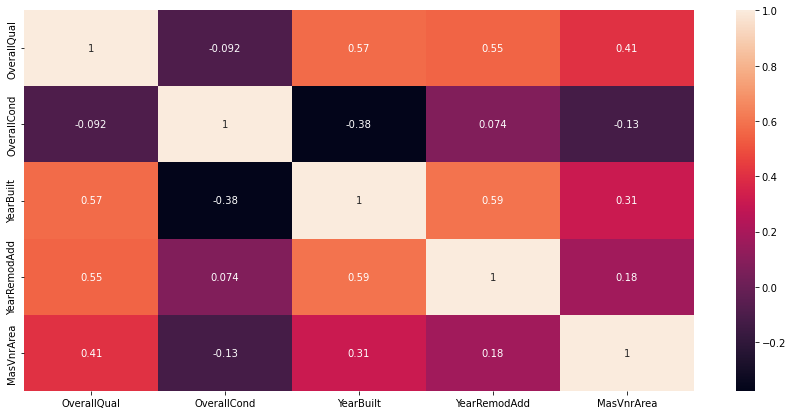

In [17]:
data_corr = data_df[name_2].corr()
plt.figure(figsize=(15,7))
sns.heatmap(data_corr,annot=True);

The correlation between `RoofStyle` and `YearBuilt`

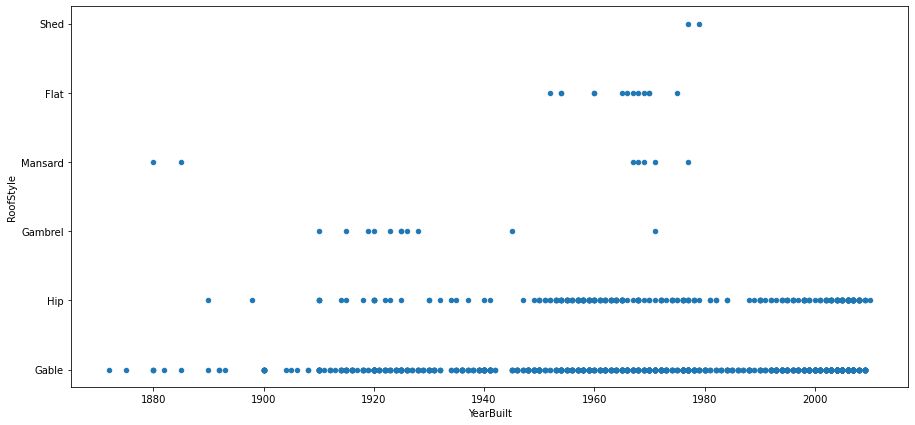

In [18]:
data_df.plot.scatter(x='YearBuilt',y='RoofStyle',figsize=(15,7));

<center> <a href="#top" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="3.3"></a>
<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#470437;font-size:200%;font-weight: 500;color:white;overflow:hidden;">ㅤColumns 33 - 48ㅤ</span>
<p style="text-align: center;">
<img src="https://raw.githubusercontent.com/ntclai/PictureForMyProject/main/chart.png" style='width: 150px; height: 150px;'>
</p>

In [19]:
col33_48 = data_df.columns[33:49]

Count the `NaN` value of each column

In [20]:
data_df[col33_48].isnull().sum()

BsmtFinType1    37
BsmtFinSF1       0
BsmtFinType2    38
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
dtype: int64

We see that there are 3 columns with missing values ​​(NaN) namely `BsmtFinType1`, `BsmtFinType2`, `Electrical`.
- As described in the file `data_description.txt`, the columns `BsmtFinType1` and `BsmtFinType2` carry the value `NaN` when there is no basement, we will fill these `NaN` values ​​with `None`.
- As for the `Electrical` column, the description in the file `data_description.txt` does not specify when the value `NaN` is, but there is only one line with the value `Nan` in this column, so we will remove it. this line.


Fill the value `NaN` in columns `BsmtFinType1` and `BsmtFinType2` to `None`

In [21]:
data_df['BsmtFinType1'].fillna('None',inplace=True)
data_df['BsmtFinType2'].fillna('None',inplace=True)


Drop row with value `NaN` at column `Electrical`

In [22]:
data_df = data_df[data_df['Electrical'].isnull() != True]


Recount `NaN` value of each column after fill and drop

In [23]:
data_df[col33_48].isnull().sum()

BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
Heating         0
HeatingQC       0
CentralAir      0
Electrical      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

Thus, the `train set` has no missing values ​​in these columns.

### Visualize

The correlation between `GrLivArea` and `SalePrice`

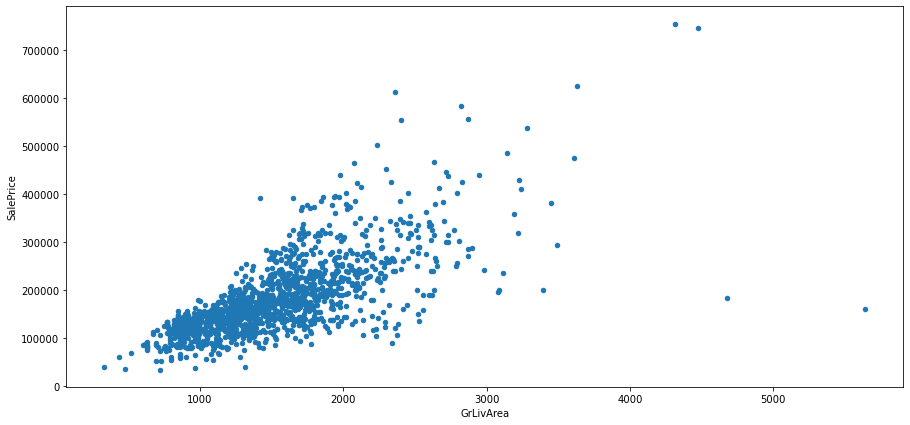

In [24]:
data_df[['GrLivArea','SalePrice']].plot(kind='scatter',x='GrLivArea',y='SalePrice',figsize=(15,7));

The correlation between `1stFlrSF` and `2ndFlrSF`

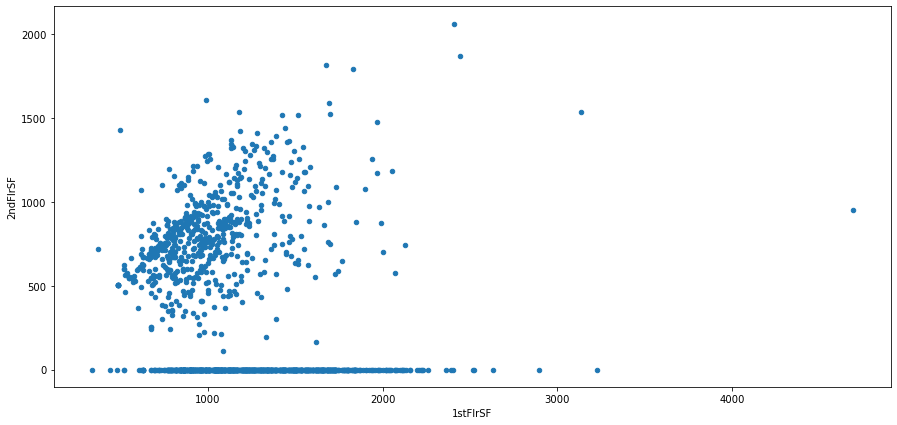

In [25]:
data_df.plot.scatter(x='1stFlrSF',y='2ndFlrSF',figsize=(15,7));

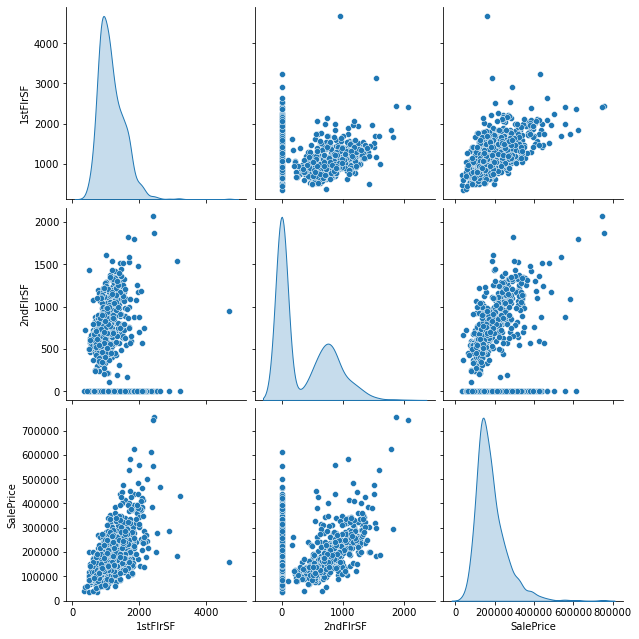

In [26]:
sns.pairplot(data_df[['1stFlrSF','2ndFlrSF','SalePrice']],diag_kind="kde",height=3);

<center> <a href="#top" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="3.4"></a>
<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#470437;font-size:200%;font-weight: 500;color:white;overflow:hidden;">ㅤColumns 49 - 64ㅤ</span>
<p style="text-align: center;">
<img src="https://raw.githubusercontent.com/ntclai/PictureForMyProject/main/chart.png" style='width: 150px; height: 150px;'>
</p>

In [27]:
buu_columns = data_df.columns[49:65]

In [28]:
data_df[buu_columns].isna().sum()

FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
FireplaceQu     689
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageCars        0
GarageArea        0
GarageQual       81
GarageCond       81
dtype: int64

We see the columns containing `nan` values ​​are `FireplaceQ`, `GarageType`, `GarageYrBlt`, `GarageFinish`, `GarageQual`, `GarageCond`. We will enter `None` in the columns `FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond` and enter `mean` in the column `GarageYrBlt`

In [29]:
noneImputer.fit(data_df.loc[:,['FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond']].values)
data_df.loc[:,['FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond']]=\
            noneImputer.transform(data_df.loc[:,['FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond']].values)

meanImputer.fit(data_df.loc[:,'GarageYrBlt'].values.reshape(-1, 1))
data_df.loc[:,'GarageYrBlt']=meanImputer.transform(data_df.loc[:,'GarageYrBlt'].values.reshape(-1, 1))

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


### Visualize


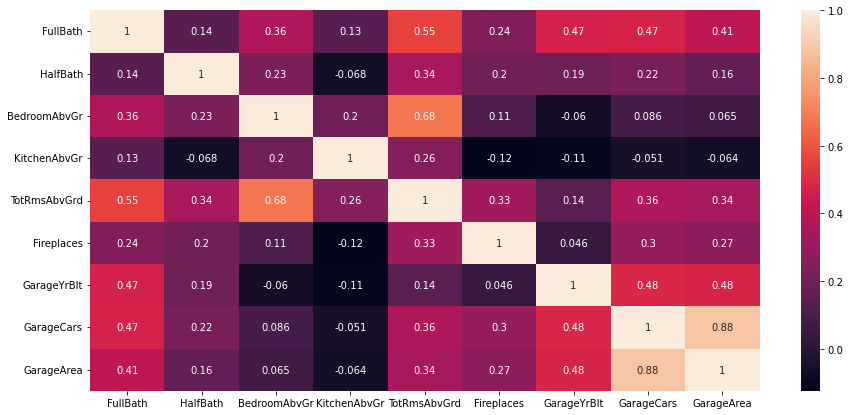

In [30]:
buu_corr = data_df[buu_columns].corr()
plt.figure(figsize=(15,7))
sns.heatmap(buu_corr,annot=True);

The correlation between `GarageCars` and `GarageArea`

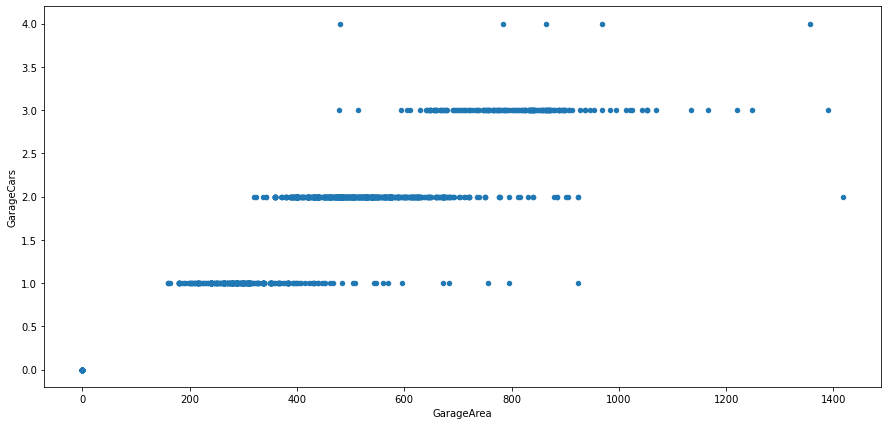

In [31]:
data_df[buu_columns].plot.scatter(x='GarageArea',y='GarageCars',figsize=(15,7));

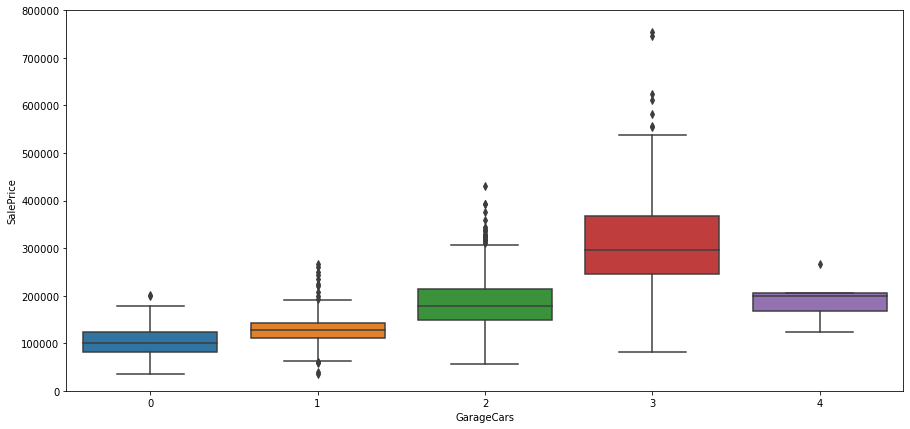

In [32]:
var = 'GarageCars'
data = pd.concat([data_df['SalePrice'], data_df[var]], axis=1)
f, ax = plt.subplots(figsize=(15, 7))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

<center> <a href="#top" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="3.5"></a>
<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#470437;font-size:200%;font-weight: 500;color:white;overflow:hidden;">ㅤColumns 65 - 80ㅤ</span>
<p style="text-align: center;">
<img src="https://raw.githubusercontent.com/ntclai/PictureForMyProject/main/chart.png" style='width: 150px; height: 150px;'>
</p>

In [33]:
cols=data_df.columns[65:81].tolist()

In [34]:
data_df[cols].isnull().sum()

PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1452
Fence            1178
MiscFeature      1405
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

- There are 3 columns missing, which are:

    - `PoolQC`(pool quality) is missing 1452 values.

    - `Fence`(fence quality) is missing 1178 values.

    - `MiscFeature`(miscellaneous item) is missing 1405 values.

We will proceed to fill in the missing values ​​with `None`.

In [35]:
data_df.loc[:,'PoolQC'].fillna("None",inplace=True)
data_df.loc[:,'Fence'].fillna("None",inplace=True)
data_df.loc[:,'MiscFeature'].fillna("None",inplace=True)

In [36]:
data_df[cols].isnull().sum()

PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC           0
Fence            0
MiscFeature      0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

The columns no longer have missing values.

### Visualize

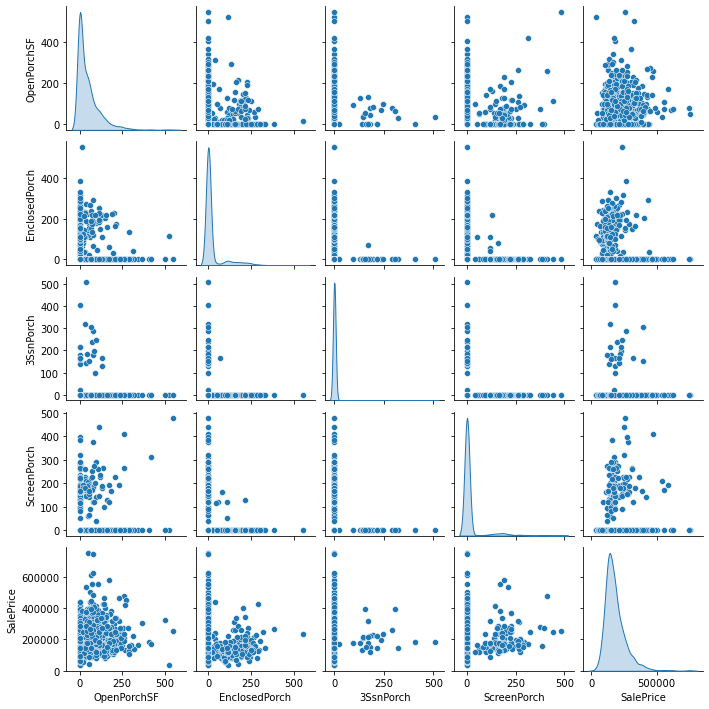

In [37]:
sns.pairplot(data_df[['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','SalePrice']],diag_kind="kde",height=2);

The correlation between `GarageCond` and `YrSold`

In [38]:
datadf=data_df.loc[:,["GarageCond","YrSold"]]
datadf

,GarageCond,YrSold
0,TA,2008
1,TA,2007
2,TA,2008
3,TA,2006
4,TA,2008
...,...,...
1455,TA,2007
1456,TA,2010
1457,TA,2010
1458,TA,2010


In [39]:
datadf["GarageCond"].value_counts()

TA      1325
None      81
Fa        35
Gd         9
Po         7
Ex         2
Name: GarageCond, dtype: int64

As we can see, the TA conditional garage is sold the most: 1326, far ahead of the rest.

In [40]:
datadf=datadf[datadf["GarageCond"]=='TA']
datadf

,GarageCond,YrSold
0,TA,2008
1,TA,2007
2,TA,2008
3,TA,2006
4,TA,2008
...,...,...
1455,TA,2007
1456,TA,2010
1457,TA,2010
1458,TA,2010


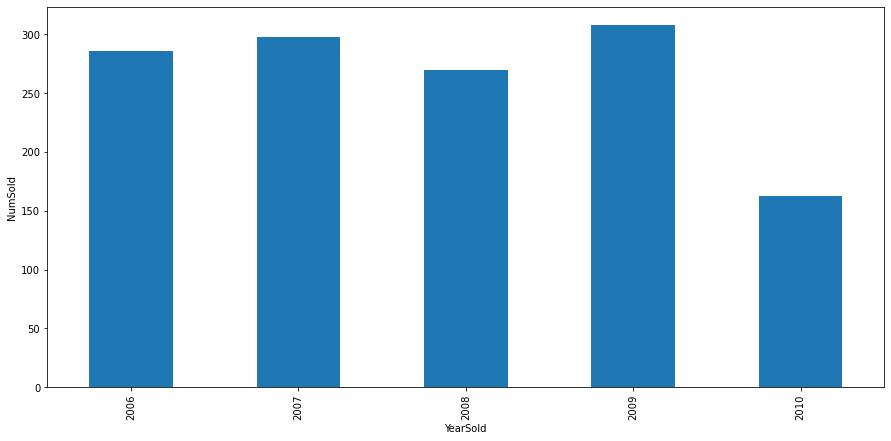

In [41]:
dataVisua=datadf["YrSold"].value_counts()
dataVisua=dataVisua.sort_index()
dataVisua.plot.bar(xlabel="YearSold",ylabel="NumSold",figsize=(15,7));

The number of sales from 2006 to 2009 did not differ much, but in 2010 it decreased significantly. It is likely that in the future, buyers will pay more attention to the condition of the garage instead of buying the common type as before.

<center> <a href="#top" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="3.6"></a>
<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#470437;font-size:200%;font-weight: 500;color:white;overflow:hidden;">ㅤPipelineㅤ</span>
<p style="text-align: center;">
<img src="https://raw.githubusercontent.com/ntclai/PictureForMyProject/main/1190961.png" style='width: 150px; height: 150px;'>
</p>

**Read data**

In [42]:
data_df = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
data_df.head().style.set_properties(**{'background-color': 'aliceblue' ,'color':'black','border-color': '#8b8c8c'})

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000000,8450,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,nan,Attchd,2003.000000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,nan,nan,nan,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000000,9600,Pave,nan,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,nan,nan,nan,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000000,11250,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,nan,nan,nan,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000000,9550,Pave,nan,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,nan,nan,nan,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000000,14260,Pave,nan,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,nan,nan,nan,0,12,2008,WD,Normal,250000


**Split training and validation data**

In [43]:
y_sr = data_df["SalePrice"]
X_df = data_df.drop("SalePrice", axis=1)

In [44]:
train_X_df, val_X_df, train_y_sr, val_y_sr = train_test_split(X_df, y_sr, 
                                               test_size=0.2, 
                                               random_state=0)

**Create pipeline**

In [45]:
def GroupingColumns(df):
    categorical_cols = []
    numerical_cols = []
    for col in df.columns:
        if df[col].dtype=='object':
            categorical_cols.append(col)
        else:
            numerical_cols.append(col)
    return categorical_cols, numerical_cols

In [46]:
cate_cols_with_nan_defined = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
                              'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC',
                             'Fence','MiscFeature']
cate_cols_considered = ['MSSubClass']
remaining_cols=[col for col in train_X_df.columns if col not in cate_cols_with_nan_defined+cate_cols_considered]
remaining_cate_cols, numerical_cols = GroupingColumns(train_X_df[remaining_cols])
cate_cols = cate_cols_with_nan_defined + cate_cols_considered + remaining_cate_cols
numerical_cols.remove('Id')

In [47]:
modeImputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
meanImputer = SimpleImputer(missing_values=np.nan, strategy='mean')
noneImputer = SimpleImputer(fill_value='None',strategy='constant')

In [48]:
ordinal_mappings = {
    "MSSubClass": [ 20, 30,40,45,50,60,70,75,80,85, 90,120,150,160,180,190], 
    "ExterQual": ['Po','Fa','TA','Gd','Ex'], 
    "ExterCond": ['Po','Fa','TA','Gd','Ex'],
    "LotShape": ['Reg','IR1' ,'IR2','IR3'], 
    "BsmtQual": ['None','Fa','TA','Gd','Ex'], 
    "BsmtCond": ['None','Po','Fa','TA','Gd','Ex'], 
    "BsmtExposure": ['None','No','Mn','Av','Gd'], 
    "BsmtFinType1": ['None','Unf','LwQ', 'Rec','BLQ','ALQ' , 'GLQ' ], 
    "BsmtFinType2": ['None','Unf','LwQ', 'Rec','BLQ','ALQ' , 'GLQ' ], 
    "HeatingQC": ['Po','Fa','TA','Gd','Ex'], 
    "Functional": ['Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'], 
    "FireplaceQu": ['None','Po','Fa','TA','Gd','Ex'], 
    "KitchenQual": ['Fa','TA','Gd','Ex'], 
    "GarageFinish": ['None','Unf','RFn','Fin'], 
    "GarageQual": ['None','Po','Fa','TA','Gd','Ex'], 
    "GarageCond": ['None','Po','Fa','TA','Gd','Ex'], 
    "PoolQC": ['None','Fa','Gd','Ex'], 
    "Fence": ['None','MnWw','GdWo','MnPrv','GdPrv'],
}
   
ordinal_encoding_cols1 = ['MSSubClass','ExterQual','ExterCond','LotShape','HeatingQC','Functional','KitchenQual']
ordinal_encoder1 = OrdinalEncoder(categories=[ordinal_mappings[i] for i in ordinal_encoding_cols1])

ordinal_encoding_cols2 = [col for col in [*ordinal_mappings] if col not in ordinal_encoding_cols1]
ordinal_encoder2 = OrdinalEncoder(categories=[ordinal_mappings[i] for i in ordinal_encoding_cols2])

oh_encoding_cols = [col for col in cate_cols if col not in [*ordinal_mappings]]
oh_encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)
mode_oh = list(set(remaining_cate_cols) & set(oh_encoding_cols))
none_oh = list(set(cate_cols_with_nan_defined) & set(oh_encoding_cols))

In [49]:
class columnDropperTransformer():
    def __init__(self,columns):
        self.columns=columns

    def transform(self,X,y=None):
        return X.drop(self.columns,axis=1)

    def fit(self, X, y=None):
        return self

In [50]:
mode_oh_pl = Pipeline([('Mode',modeImputer),('OneHotEncode',oh_encoder)])
mode_or_pl = Pipeline([('Mode',modeImputer),('OrdinalEncode',ordinal_encoder1)])
none_oh_pl = Pipeline([('None',noneImputer),('OneHotEncode',oh_encoder)])
none_or_pl = Pipeline([('None',noneImputer),('OrdinalEncode',ordinal_encoder2)])

cols_transformer = ColumnTransformer([
    ('Mean',meanImputer,numerical_cols),
    ('Mode-OHEncode',mode_oh_pl,mode_oh),
    ('Mode-OdEncode',mode_or_pl,ordinal_encoding_cols1),
    ('None-OHEncode',none_oh_pl,none_oh),
    ('None-OdEncode',none_or_pl,ordinal_encoding_cols2),
])
preprocess = Pipeline([
    ("columnDropper", columnDropperTransformer(['Id'])),
    ('ColsTransformer',cols_transformer),
    ('StdScaler',StandardScaler())
])

preprocess

Pipeline(steps=[('columnDropper',
                 <__main__.columnDropperTransformer object at 0x7ff11bd83950>),
                ('ColsTransformer',
                 ColumnTransformer(transformers=[('Mean', SimpleImputer(),
                                                  ['LotFrontage', 'LotArea',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'LowQualFinSF',
                                                   '...
                                                                                               'Gd',
                                                                                               'Ex'],
                                                                                              ['None',
                                                                                               'Unf',
                                                                                               'RFn',
                                                                                               'Fin'],
                                                                                              ['None',
                                                                                               'Po',
                                                                                               'Fa',
                                                                                               'TA',
                                                                                               'Gd',
                                                                                               'Ex'],
                                                                                              ['None',
                                                                                               'Po',
                                                                                               'Fa',
                                                                                               'TA',
                                                                                               'Gd',
                                                                                               'Ex'],
                                                                                              ['None',
                                                                                               'Fa',
                                                                                               'Gd',
                                                                                               'Ex'],
                                                                                              ['None',
                                                                                               'MnWw',
                                                                                               'GdWo',
                                                                                               'MnPrv',
                                                                                               'GdPrv']]))]),
                                                  ['BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2',
                                                   'FireplaceQu',
                                                   'GarageFinish

<center> <a href="#top" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4"></a>
# <p style="padding:10px;background-color:#0D1C5A;margin:0;color:#F1F40D;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Run Machine Learning model</p>

<a id="4.1"></a>
<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#470437;font-size:200%;font-weight: 500;color:white;overflow:hidden;">ㅤEvaluation functionㅤ</span>
<p style="text-align: center;">
<img src="https://raw.githubusercontent.com/ntclai/PictureForMyProject/main/setting.png" style='width: 150px; height: 150px;'>
</p>

In [51]:
def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true,y_pred)
    mse = mean_squared_error(y_true,y_pred)
    rsquare = r2_score(y_true,y_pred)
    rmse = mean_squared_error(y_true,y_pred,squared = False)
    try:
        rmsle = mean_squared_log_error(y_true,y_pred,squared = False)
    except:
        rmsle = np.nan
    return mae, mse, rsquare, rmse, rmsle

<center> <a href="#top" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4.2"></a>
<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#470437;font-size:200%;font-weight: 500;color:white;overflow:hidden;">List of machine learning model </span>
<p style="text-align: center;">
<img src="https://raw.githubusercontent.com/ntclai/PictureForMyProject/main/41591_2020_1197_Figa_HTML.png" style='width: 180px; height: 100px;'>
</p>

<h3 style="font-family: Verdana; font-size: 15px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A3399; background-color: #ffffff;"><b>We</b> using<b> regression</b> models: </h3>

> `Decision Tree Regressor` <br>
> `Linear Regression` <br>
> `Lasso Lars` <br>
> `Ridge Regression` <br>
> `SVR` <br>
> `Random Forest Regression` <br>
> `Logistic Regression` <br>
> `Bayesian Ridge` <br>
> `Gradient Boostring` <br>

In [52]:
model_list = {
    'decision_tree_regression':DecisionTreeRegressor(random_state = 42),
    'linear_regression':LinearRegression(),
    'lasso_lars':LassoLars(alpha=41,eps=1.38,random_state = 42,normalize=False),
    'ridge_regression':Ridge(alpha=1778,random_state=42),
    'SVR': SVR(),
    'random_forest_regression':RandomForestRegressor(n_estimators=400,random_state = 42),
    'logistic_regression':LogisticRegression(random_state = 42),
    'bayesian_ridge':BayesianRidge(),
    'gradient_boosting':GradientBoostingRegressor(random_state = 42),
}

<center> <a href="#top" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4.3"></a>
<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#470437;font-size:200%;font-weight: 500;color:white;overflow:hidden;"> Train model and evaluate </span>
<p style="text-align: center;">
<img src="https://raw.githubusercontent.com/ntclai/PictureForMyProject/main/training.png" style='width: 150px; height: 150px;'>
</p>

<h3 style="font-family: Verdana; font-size: 15px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #0A3399; background-color: #ffffff;"><b>We</b> will<b> evaluate</b> the <b> models </b> by: </h3>

> `MAE` <br> 
> `MSE` <br>
> `R2 Square` <br>
> `RMSE` <br>
> `RMSLE` <br>

In [53]:
preprocessed_train_X = preprocess.fit_transform(train_X_df)
preprocessed_val_X = preprocess.transform(val_X_df)
score = dict()
for key in model_list.keys():
    model = model_list[key].fit(preprocessed_train_X,train_y_sr)
    val_y_pred = model.predict(preprocessed_val_X)
    score[key] = evaluate(val_y_sr,val_y_pred)
score_df = pd.DataFrame(score).T.round(5)
score_df.columns=['MAE','MSE','R2 Square','RMSE','RMSLE']
score_df.style.set_properties(**{'background-color': 'aliceblue' ,'color':'black','border-color': '#8b8c8c'})

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_least_angle.py:688: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 113 iterations, alpha=5.278e+02, previous alpha=5.272e+02, with an active set of 108 regressors.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


,MAE,MSE,R2 Square,RMSE,RMSLE
decision_tree_regression,26741.972600,2435514773.095890,0.647330,49350.934880,0.215590
linear_regression,755508528053794.125000,42615792298361539581387976212480.000000,-6170969905296879648768.000000,6528077228277982.000000,nan
lasso_lars,21782.208230,2615407676.622130,0.621280,51141.056660,0.229700
ridge_regression,21580.039430,1962877648.182600,0.715770,44304.375050,0.166600
SVR,55532.494500,7239551916.601590,-0.048320,85085.556450,0.389780
random_forest_regression,17154.980620,1108601751.664970,0.839470,33295.671670,0.140510
logistic_regression,36509.188360,4425206115.948630,0.359210,66522.222720,0.277020
bayesian_ridge,22629.399820,2647103297.770650,0.616690,51450.007750,0.234790
gradient_boosting,16726.900420,905934250.166160,0.868820,30098.741670,0.131080


<center> <a href="#top" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4.4"></a>
<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#470437;font-size:200%;font-weight: 500;color:white;overflow:hidden;"> Predict on test data </span>
<p style="text-align: center;">
<img src="https://raw.githubusercontent.com/ntclai/PictureForMyProject/main/910373.png" style='width: 150px; height: 150px;'>
</p>

In [54]:
test_X_df = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")
preprocessed_X_df = preprocess.fit_transform(X_df)
preprocessed_test_X_df = preprocess.transform(test_X_df)
for key in model_list.keys():
    model = model_list[key].fit(preprocessed_X_df,y_sr)
    test_y_sr = model.predict(preprocessed_test_X_df)
    df=pd.DataFrame({'Id':test_X_df.Id,'SalePrice':test_y_sr})
    df.to_csv('/kaggle/working/'+key+'.csv',index=False)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_least_angle.py:688: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 183 iterations, alpha=1.376e+02, previous alpha=1.316e+02, with an active set of 166 regressors.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


<center> <a href="#top" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="5"></a>
# <p style="padding:10px;background-color:#0D1C5A;margin:0;color:#F1F40D;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Conclusion and submission</p>

<a id="5.1"></a>
<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#470437;font-size:200%;font-weight: 500;color:white;overflow:hidden;"> Conclusion </span>  
<p style="text-align: center;">
<img src="https://raw.githubusercontent.com/ntclai/PictureForMyProject/main/conclusion.jpg" style='width: 150px; height: 150px;'>
</p>

<div style="border-radius:10px;border:#034914 solid;padding: 15px;background-color:aliceblue;font-size:110%;text-align:left">
    
<b>Summary:</b> after training the models on the provided data, the model with the best results is <b>Gradient Boosting</b> with a score of <b>0.13683</b> (using RMSLE measure and Kaggle's test data).
</div>

<center> <a href="#top" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="5.2"></a>
<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#470437;font-size:200%;font-weight: 500;color:white;overflow:hidden;"> Submission </span>
<p style="text-align: center;">
<img src="https://raw.githubusercontent.com/ntclai/PictureForMyProject/main/5360973.png" style='width: 150px; height: 150px;'>
</p>

In [55]:
submission = pd.read_csv('/kaggle/working/gradient_boosting.csv')
submission.to_csv("submission.csv", index = False)
submission.head(10).style.set_properties(**{'background-color': 'aliceblue' ,'color':'black','border-color': '#8b8c8c'})

,Id,SalePrice
0,1461,121472.379460
1,1462,160895.374610
2,1463,178718.339742
3,1464,181564.773853
4,1465,197915.357577
5,1466,170405.406415
6,1467,161750.826655
7,1468,151377.919466
8,1469,187160.807466
9,1470,129846.818449


<center> <a href="#top" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="6"></a>
# <p style="padding:10px;background-color:#0D1C5A;margin:0;color:#F1F40D;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Author Message</p>

<center> <img src="https://raw.githubusercontent.com/ntclai/PictureForMyProject/main/Untitled.png" style='width: 200px; height: 100px;'>

<div style="border-radius:10px;border:#034914 solid;padding: 15px;background-color:aliceblue;font-size:90%;text-align:left">

<h4><b>Author :</b> Nguyen Thi Cam Lai </h4>

<h4> <b>Some information:</b> </h4>

<b>👉Read more project :</b> https://www.kaggle.com/nguyenthicamlai <br>
<b>👉Shoot me mails :</b> lainguyen130302@gmail.com<br>
<b>👉Connect on LinkedIn :</b> https://www.linkedin.com/in/ntclaii/ <br>
<b>👉Explore Github :</b> https://github.com/ntclai <br>
    
    
<center> <strong> If you liked this Notebook, please do upvote. </strong>
    
<center> <strong> If you have any questions, feel free to comment! </strong>
    
<center> <strong> ✨Best Wishes✨ </strong>

<center> <img src="https://raw.githubusercontent.com/ntclai/PictureForMyProject/main/87481-of-thanks-letter-text-logo-calligraphy-drawing%20(1).png" style='width: 600px; height: 300px;'>

<center> <a href="#top" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>